array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.82350415,
         2.16323595,  1.33652795],
       [-0.36918184, -0.23937918,  1.0996596 , ...,  1.14110187,
         1.46657872,  0.85255194],
       [-0.59865394, -1.11589699,  0.76666318, ..., -0.21673147,
        -0.9301565 , -0.17858909],
       ...,
       [ 0.83505532, -1.53804325,  2.20150754, ..., -0.1527946 ,
         1.24856454,  0.22399753],
       [ 0.61503954,  0.12956384,  0.0960831 , ...,  0.97220715,
        -0.91895048,  0.6632405 ],
       [-0.1334914 , -1.56637034, -1.74865144, ...,  0.51687218,
        -0.03292069,  1.29811143]])

(50, 200)


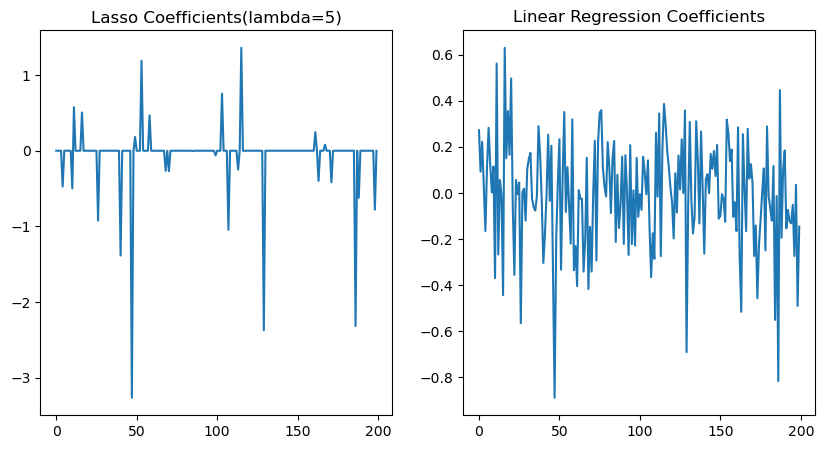

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 创建数据集
np.random.seed(0)
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)

display(X)
print(X.shape)

# 创建一个稀疏的系数
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # 只保留10个非零系数

# 添加噪声
y = np.dot(X, coef)
y += 0.01 * np.random.normal(size=n_samples)
# print(y)

# 分割数据集
n_train, n_test = 30, 20
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# 导入 Lasso 类
from sklearn.linear_model import Lasso

# 使用 L1 正则化（Lasso 回归）
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

# 使用无正则化的线性回归
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)

# 绘制权重系数的对比
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(lasso.coef_, label="Lasso coefficients")
plt.title("Lasso Coefficients(lambda=5)")
plt.subplot(122)
plt.plot(lr.coef_, label="Linear Regression coefficients")
plt.title("Linear Regression Coefficients")
plt.show()




In [2]:
# 修改参数设置，以更明显地展示L1正则化导致权重稀疏化的效果

# 重新初始化参数
theta = np.array([1.0, 0.5])  # 初始权重，有两个特征
alpha = 0.01  # 学习率
lambda_ = 1.0  # 增大正则化强度以便观察效果
iterations = 100  # 迭代次数

# 假设数据点
x = np.array([[1, 2], [2, 1], [3, 4], [4, 3]])  # 4个样本，2个特征
y = np.array([1, 2, 3, 4])  # 目标值

# 执行梯度下降，使用L1正则化
for i in range(iterations):
    # 预测值
    y_pred = np.dot(x, theta)
    # 损失函数的梯度
    gradient = -np.dot(x.T, (y - y_pred)) / len(y) 
    # L1 正则化的梯度
    l1_gradient = lambda_ * np.sign(theta)
    # 更新权重
    theta -= alpha * (gradient + l1_gradient)

# 执行梯度下降，不使用L1正则化
theta_no_l1 = np.array([1.0, 0.5])  # 相同的初始权重
for i in range(iterations):
    # 预测值
    y_pred_no_l1 = np.dot(x, theta_no_l1)
    # 损失函数的梯度
    gradient_no_l1 = -np.dot(x.T, (y - y_pred_no_l1)) / len(y)
    # 更新权重
    theta_no_l1 -= alpha * gradient_no_l1

print(theta)
print(theta_no_l1)



[0.77959192 0.08247714]
[0.84855743 0.15144265]
